In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

2023-09-14 00:11:51.507561: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-14 00:11:52.491286: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-09-14 00:11:54.344591: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 00:11:54.457660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 00:11:54.457718: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

images=ImageDataGenerator(rescale=1./255)
real_images=images.flow_from_directory(
    'faces/data',
    target_size=(30,30),
    batch_size=32,
    class_mode=None,
    shuffle=False,
)

Found 538 images belonging to 1 classes.


In [4]:
class Model():
    def generator(self):
        self.genmodel=tf.keras.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation=tf.keras.layers.LeakyReLU(),input_shape=(120,120,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Conv2D(64,(3,3),activation=tf.keras.layers.LeakyReLU()),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Conv2D(32,(3,3),activation=tf.keras.layers.LeakyReLU()),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Conv2DTranspose(32,(3,3),activation=tf.keras.layers.LeakyReLU()),
            tf.keras.layers.UpSampling2D(size=(2,2)),
            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Dense(3,activation='tanh'),
        ])

        self.genmodel.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
        
        return self.genmodel
    
    def discriminator(self):
        self.desmodel=tf.keras.Sequential([
            tf.keras.layers.Conv2D(64,(3,3),activation=tf.keras.layers.LeakyReLU(),input_shape=(30,30,3)),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Conv2D(64,(3,3),activation=tf.keras.layers.LeakyReLU()),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.BatchNormalization(),

            tf.keras.layers.Dropout(0.5),

            tf.keras.layers.Conv2D(32,(3,3),activation=tf.keras.layers.LeakyReLU()),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.BatchNormalization(),
            
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(1,activation='sigmoid')
        ])

        self.desmodel.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])
        
        return self.desmodel

In [5]:
des=Model().discriminator()

2023-09-14 00:11:58.483451: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 00:11:58.483599: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 00:11:58.483633: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 00:11:59.652330: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-14 00:11:59.652417: I tensorflow/compile

In [6]:
des.predict(real_images.next())

2023-09-14 00:12:01.768663: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1/1 [==============================] - 2s 2s/step


array([[0.55568063],
       [0.54695547],
       [0.5481011 ],
       [0.5302244 ],
       [0.5470703 ],
       [0.5513339 ],
       [0.5389335 ],
       [0.55512637],
       [0.5566063 ],
       [0.5392255 ],
       [0.543584  ],
       [0.55246866],
       [0.54512024],
       [0.54422075],
       [0.54524726],
       [0.53700864],
       [0.5625528 ],
       [0.55419075],
       [0.54829216],
       [0.5592962 ],
       [0.5477493 ],
       [0.55530953],
       [0.5804426 ],
       [0.55740905],
       [0.5475477 ],
       [0.54674673],
       [0.53710955],
       [0.5490103 ],
       [0.5550311 ],
       [0.53727454],
       [0.5464723 ],
       [0.5505007 ]], dtype=float32)

In [7]:
gen=Model().generator()

In [8]:
prediction=gen.predict(tf.random.normal([1,120,120,3]))

1/1 [==============================] - 1s 584ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


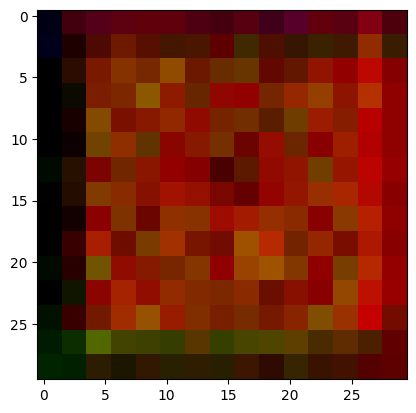

In [9]:
plt.imshow(prediction[0])

In [10]:
del des
del gen

In [11]:
from tensorflow.keras.models import load_model

In [16]:
class Train():
    def __init__(self):
        # # try:
        # self.gen=load_model('generator.h5')
        # self.des=load_model('discriminator.h5')
        # #  except:
        self.gen=Model().generator()
        self.des=Model().discriminator()

    def train_step(self,steps,batch_size,epoch):
        self.steps=steps
        self.batch_size=batch_size
        for i in range(self.steps):
            real=self.data.next()
            fake=self.gen(tf.random.normal([self.batch_size,120,120,3]),training=False)
            
            if i%1==0:
                with tf.GradientTape() as tape:
                    pred_real=self.des(real,training=True)
                    pred_fake=self.des(fake,training=True)

                    pred=tf.concat([pred_real,pred_fake],axis=0)
                    labels=tf.concat([tf.ones_like(pred_real),tf.zeros_like(pred_fake)],axis=0)

                    real_noise=tf.random.uniform(tf.shape(pred_real))*0.1
                    fake_noise=tf.random.uniform(tf.shape(pred_fake))*0.1

                    pred+=tf.concat([real_noise,fake_noise],axis=0)

                    des_loss=tf.keras.losses.BinaryCrossentropy()(labels,pred)
                
                grads=tape.gradient(des_loss,self.des.trainable_variables)
                tf.keras.optimizers.Adam(learning_rate=0.0001).apply_gradients(zip(grads,self.des.trainable_variables))

            if i%10==0:
                with tf.GradientTape() as tape:
                    fake=self.gen(tf.random.normal([self.batch_size,120,120,3]))

                    pred=self.des(fake,training=False)

                    gen_loss=tf.keras.losses.BinaryCrossentropy()(np.ones((self.batch_size,1)),pred)

                grads=tape.gradient(gen_loss,self.gen.trainable_variables)
                tf.keras.optimizers.Adam(learning_rate=0.0001).apply_gradients(zip(grads,self.gen.trainable_variables))
            clear_output()
            print(f'step {i+1} completed, generator loss: {gen_loss}, discriminator loss: {des_loss}')

        print(f' epoch {epoch+1} completed, generator loss: {gen_loss}, discriminator loss: {des_loss}')
        self.generate()
        self.save()

    def train(self,data,epochs):
        self.data=data
        for i in range(epochs):
            self.epochs=epochs
            self.train_step(10,128,i)

    def save(self):
        self.gen.save('generator.h5')
        self.des.save('discriminator.h5')

    def generate(self):
        prediction=self.gen.predict(tf.random.normal([1,120,120,3]))
        plt.imshow(prediction[0])
        cv2.imwrite('./predicted/generated.png',prediction[0]*255)

In [17]:
train=Train()

In [18]:
from IPython.display import clear_output

step 7 completed, generator loss: 3.331082344055176, discriminator loss: 0.06423954665660858


KeyboardInterrupt: 

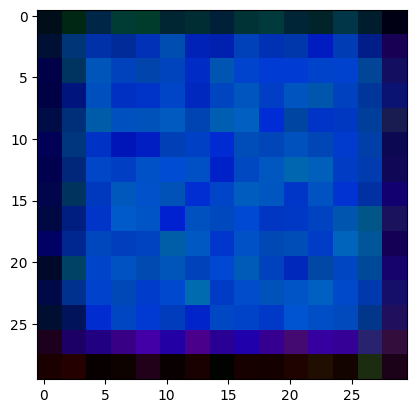

In [19]:
train.train(real_images,1000)

In [ ]:
train.save()

1/1 [==============================] - 0s 25ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


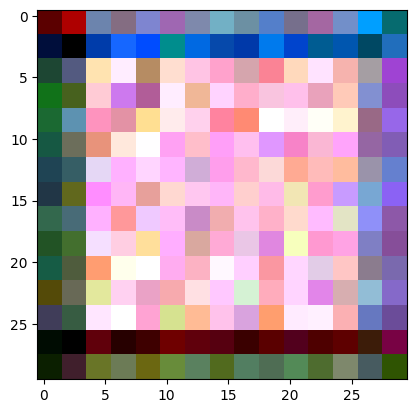

In [ ]:
train.generate()